In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16, MobileNetV2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import CategoricalCrossentropy
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import Sequential, layers
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from tensorflow.keras.applications import ConvNeXtBase, ConvNeXtXLarge
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
train_dir = '/Users/davemag9/Desktop/Diploma/archive1/Indian Food Images/Indian Food Images'

train_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/train_set'
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(train_dir) if
                  os.path.isdir(os.path.join(train_dir, d))]
subdirectories

['/Users/davemag9/Desktop/Diploma/food20dataset/train_set/vada pav',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/idly',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/bisibelebath',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/ice_cream',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/samosa',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/paniyaram',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/chicken_curry',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/cheesecake',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/meduvadai',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/ven pongal',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/hot_dog',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/dhokla',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/apple_pie',
 '/Users/davemag9/Desktop/Diploma/food20dataset/train_set/chaat',
 '/Users/davemag9/Desktop/Dip

In [3]:
categories = sorted(os.listdir(train_dir))
categories = [category for category in categories if category != '.DS_Store']

categories

['apple_pie',
 'biriyani',
 'bisibelebath',
 'butternaan',
 'chaat',
 'chappati',
 'cheesecake',
 'chicken_curry',
 'dhokla',
 'dosa',
 'french_fries',
 'fried_rice',
 'gulab jamun',
 'halwa',
 'hamburger',
 'hot_dog',
 'ice_cream',
 'idly',
 'kathi roll',
 'meduvadai',
 'noodles',
 'omelette',
 'paniyaram',
 'pizza',
 'poori',
 'samosa',
 'sushi',
 'tandoori chicken',
 'upma',
 'vada pav',
 'ven pongal']

In [4]:
df = pd.DataFrame(columns=['image_path', 'label'])
df

,image_path,label


In [5]:
dfs = []

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [6]:
dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(train_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
        count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

In [7]:
df = pd.concat(dfs, ignore_index=True)
df

,image_path,label
0,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
1,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
2,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
3,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
4,/Users/davemag9/Desktop/Diploma/food20dataset/...,apple_pie
...,...,...
2176,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2177,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2178,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal
2179,/Users/davemag9/Desktop/Diploma/food20dataset/...,ven pongal


In [8]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [9]:
train_df.shape

(1744, 2)

In [10]:
val_df.shape

(437, 2)

In [11]:
# val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42, shuffle=True)

In [12]:
val_df.shape

(437, 2)

In [13]:
# test_df.shape

In [14]:
augmentation_params = {
    'rotation_range': 20,
    'width_shift_range': 0.1,
    'height_shift_range': 0.1,
    'shear_range': 0.2,
    'zoom_range': 0.1,
    'horizontal_flip': True,
    'fill_mode': 'nearest'
}
img_size = (224, 224)
batch_size = 32

In [15]:
train_datagen = ImageDataGenerator(
    # rescale=1. / 255,
    **augmentation_params
)
val_datagen = ImageDataGenerator(
    # rescale=1. / 255
)
# test_datagen = ImageDataGenerator(
#     rescale=1. / 255
# )

In [16]:
train_images = train_datagen.flow_from_dataframe(
    train_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=True,
    seed=42,
    class_mode='categorical'
)

Found 1735 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 9 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [17]:
val_images = val_datagen.flow_from_dataframe(
    val_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 435 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [18]:
# test_images = test_datagen.flow_from_dataframe(
#     test_df,
#     x_col='image_path',
#     y_col='label',
#
#     target_size=img_size,
#     batch_size=batch_size,
#
#     shuffle=False,
#     seed=42,
#     class_mode='categorical'
# )

In [19]:
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D

def basic_block(x, filters, stride=1, downsample=False):
    shortcut = x

    x = Conv2D(filters, 3, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters, 3, padding='same')(x)
    x = BatchNormalization()(x)

    if downsample or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, 1, strides=stride)(shortcut)
        shortcut = BatchNormalization()(shortcut)

    x = Add()([x, shortcut])
    x = ReLU()(x)
    return x

def make_layer(x, filters, blocks, stride):
    x = basic_block(x, filters, stride, downsample=True)
    for _ in range(1, blocks):
        x = basic_block(x, filters)
    return x

def build_resnet34(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, 7, strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    x = make_layer(x, 64, blocks=3, stride=1)
    x = make_layer(x, 128, blocks=4, stride=2)
    x = make_layer(x, 256, blocks=6, stride=2)
    x = make_layer(x, 512, blocks=3, stride=2)

    x = GlobalAveragePooling2D()(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    return Model(inputs, outputs, name='ResNet34')

# Build the model
input_shape = (img_size[0], img_size[1], 3)
model_mn = build_resnet34(input_shape, num_classes=len(categories))


In [20]:
model_mn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_mn = model_mn.fit(
    train_images,
    validation_data=val_images,
    epochs=10,
    callbacks=[
        EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
 4/55 ━━━━━━━━━━━━━━━━━━━━ 8:20 10s/step - accuracy: 0.0169 - loss: 4.8490

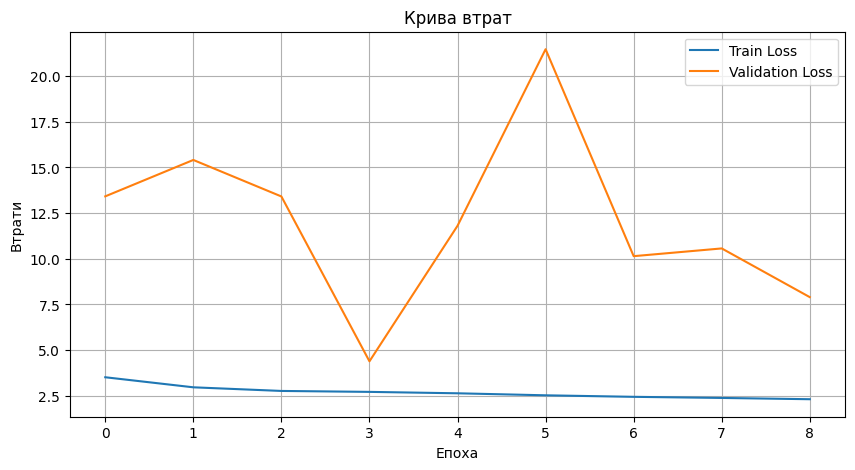

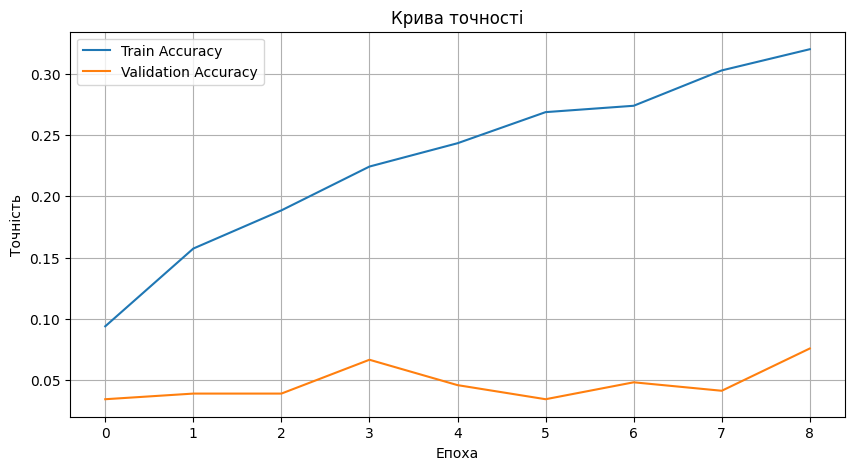

In [ ]:
import matplotlib.pyplot as plt

# --- Побудова графіку втрат ---
plt.figure(figsize=(10, 5))
plt.plot(history_mn.history['loss'], label='Train Loss')
plt.plot(history_mn.history['val_loss'], label='Validation Loss')
plt.title('Крива втрат')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)
plt.show()

# --- Побудова графіку точності ---
plt.figure(figsize=(10, 5))
plt.plot(history_mn.history['accuracy'], label='Train Accuracy')
plt.plot(history_mn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Крива точності')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
test_dir = '/Users/davemag9/Desktop/Diploma/food20dataset/test_set'
subdirectories = [os.path.join(train_dir, d) for d in os.listdir(test_dir) if
                  os.path.isdir(os.path.join(test_dir, d))]

categories = sorted(os.listdir(test_dir))
categories = [category for category in categories if category != '.DS_Store']


df = pd.DataFrame(columns=['image_path', 'label'])

dfs = []

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)


dfs = []
max_images_per_category = 600

for category in categories:
    category_path = os.path.join(test_dir, category)
    image_data = []
    count = 0
    for image_name in os.listdir(category_path):
        if count >= max_images_per_category:
            break
        image_path = os.path.join(category_path, image_name)
        image_data.append({'image_path': image_path, 'label': category})
        count += 1
    df_category = pd.DataFrame(image_data)
    dfs.append(df_category)

test_df = pd.concat(dfs, ignore_index=True)


test_datagen = ImageDataGenerator(
    # rescale=1. / 255
)

test_images = test_datagen.flow_from_dataframe(
    test_df,
    x_col='image_path',
    y_col='label',

    target_size=img_size,
    batch_size=batch_size,

    shuffle=False,
    seed=42,
    class_mode='categorical'
)

Found 930 validated image filenames belonging to 31 classes.


/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


In [ ]:
predictions = model_mn.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

predicted_classes[:80]

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


30/30 ━━━━━━━━━━━━━━━━━━━━ 30s 986ms/step


array([ 2,  0,  6,  6,  6,  6, 11,  2,  6,  6,  2,  6,  0,  6, 10,  6,  6,
       12, 10, 10,  7, 10,  6,  2,  6, 10, 10, 10, 10,  6,  2, 20, 20, 20,
        2, 20, 20,  2, 20, 11, 20, 11,  2, 20, 20,  2,  2, 20,  2,  2,  6,
       20,  2,  2, 20,  6,  2, 20, 20, 20, 20, 13,  2,  2, 11,  2,  2,  2,
       20,  2, 10, 20,  2, 20, 20, 11,  2,  6, 20, 20])

In [ ]:
true_classes = test_images.classes
class_labels = list(val_images.class_indices.keys())
num_images = 25
count = 0

while count < num_images:
    print(f"{count + 1}. Label: {true_classes[count]}, Prediction: {predicted_classes[count]}")
    count += 1

1. Label: 0, Prediction: 2
2. Label: 0, Prediction: 0
3. Label: 0, Prediction: 6
4. Label: 0, Prediction: 6
5. Label: 0, Prediction: 6
6. Label: 0, Prediction: 6
7. Label: 0, Prediction: 11
8. Label: 0, Prediction: 2
9. Label: 0, Prediction: 6
10. Label: 0, Prediction: 6
11. Label: 0, Prediction: 2
12. Label: 0, Prediction: 6
13. Label: 0, Prediction: 0
14. Label: 0, Prediction: 6
15. Label: 0, Prediction: 10
16. Label: 0, Prediction: 6
17. Label: 0, Prediction: 6
18. Label: 0, Prediction: 12
19. Label: 0, Prediction: 10
20. Label: 0, Prediction: 10
21. Label: 0, Prediction: 7
22. Label: 0, Prediction: 10
23. Label: 0, Prediction: 6
24. Label: 0, Prediction: 2
25. Label: 0, Prediction: 6


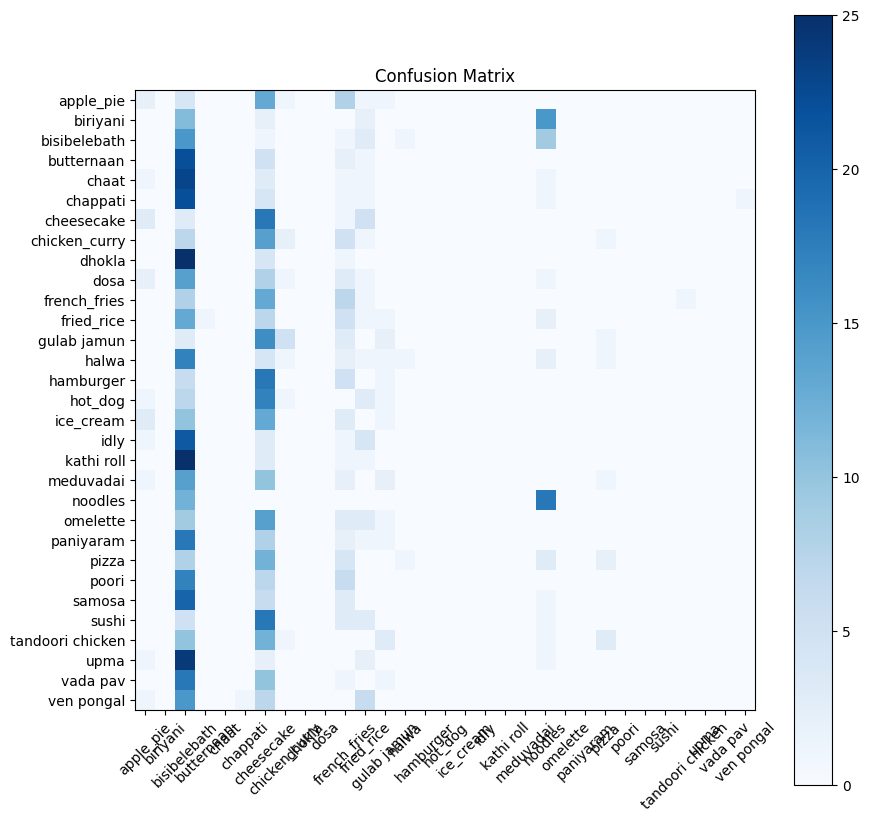

In [ ]:
cm = confusion_matrix(true_classes, predicted_classes)

plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

plt.show()

In [ ]:
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

print(report)

                  precision    recall  f1-score   support

       apple_pie       0.12      0.07      0.09        30
        biriyani       0.00      0.00      0.00        30
    bisibelebath       0.04      0.50      0.07        30
      butternaan       0.00      0.00      0.00        30
           chaat       0.00      0.00      0.00        30
        chappati       0.00      0.00      0.00        30
      cheesecake       0.07      0.60      0.12        30
   chicken_curry       0.17      0.07      0.10        30
          dhokla       0.00      0.00      0.00        30
            dosa       0.00      0.00      0.00        30
    french_fries       0.09      0.23      0.13        30
      fried_rice       0.02      0.03      0.03        30
     gulab jamun       0.12      0.07      0.09        30
           halwa       0.33      0.03      0.06        30
       hamburger       0.00      0.00      0.00        30
         hot_dog       0.00      0.00      0.00        30
       ice_cr

/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/davemag9/Desktop/Diploma/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.cap

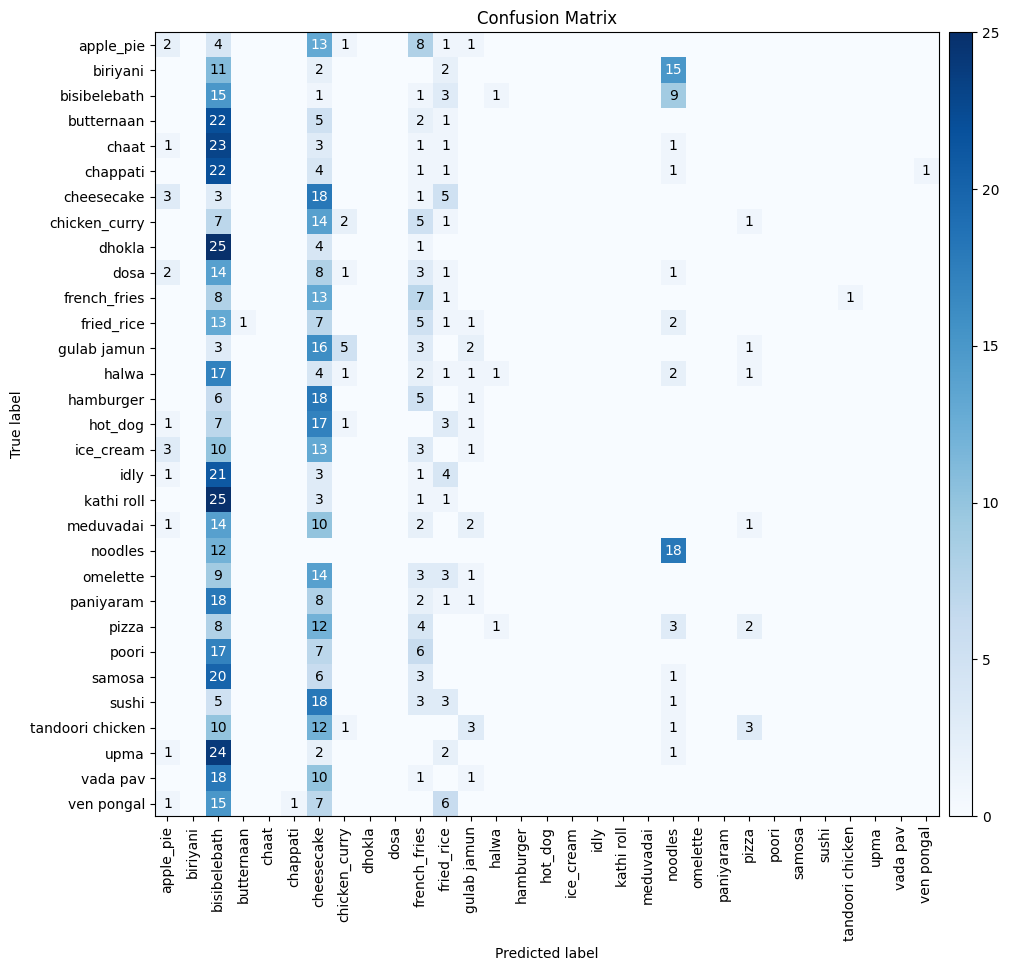

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Припускаємо, що у тебе вже є:
# true_classes = [...]
# predicted_classes = [...]
# class_labels = [...]

cm = confusion_matrix(true_classes, predicted_classes)

fig, ax = plt.subplots(figsize=(10, 10))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.set_title('Confusion Matrix')

tick_marks = np.arange(len(class_labels))
ax.set_xticks(tick_marks)
ax.set_xticklabels(class_labels, rotation=90)
ax.set_yticks(tick_marks)
ax.set_yticklabels(class_labels)

# Підпис значень у клітинках, крім 0
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        if cm[i, j] != 0:
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")

# Зменшення ширини colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="3%", pad=0.1)  # size визначає ширину
plt.colorbar(im, cax=cax)

fig.tight_layout()
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.show()